# Example 2 -- Transition Magnetic Moments

In this notebook, we explore the case of a transition magnetic moment, making use of the single photon
$$ N \to \nu \gamma $$
as well as dilepton,
$$ N \to \nu \ell^+\ell^- $$
decays of the heavy neutrinos.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import DarkNews as dn
from DarkNews import *

In [105]:
from DarkNews import GenLauncher

model_kwargs = {
    'm5': 0.200,
    'm4': 0.160,
    'mu_tr_mu5': 1.25e-6, # GeV^-1
    'mu_tr_45': 1.25e-6, # GeV^-1
    'UD4': 0,
    'Umu4': 0,
    'epsilon': 0.0,
    'gD': 0.0,
    'experiment': 'microboone_tpc'
}

# turning off Helicity conserving scattering which is negligible for TMM (but dominant for Z', for instance).
# we also ask for the single photon decays, rather than e+e-
gen_object = GenLauncher(decay_product='photon', noHC=True, HNLtype="dirac", **model_kwargs)
df_photon = gen_object.run()

model_kwargs = {
    'm4': 0.200,
    'mu_tr_mu4': 1.25e-6, # GeV^-1
    'UD4': 0,
    'Umu4': 0,
    'epsilon': 0.0,
    'gD': 0.0,
    'experiment': 'miniboone_fhc'
}

# turning off Helicity conserving scattering which is negligible for TMM (but dominant for Z', for instance).
# we also ask for the single photon decays, rather than e+e-
gen_object = GenLauncher(decay_product='photon', noHC=True, HNLtype="dirac", **model_kwargs)
df_photon_MB = gen_object.run()

# Now we generate the subleading BR into e^+e^-
# gen_object = GenLauncher(decay_product='e+e-', noHC=True, HNLtype="dirac", **model_kwargs)
# df_ee = gen_object.run()

---------------------------------------------------------

   ______           _        _   _                     
   |  _  \         | |      | \ | |                    
   | | | |__ _ _ __| | __   |  \| | _____      _____   
   | | | / _  | ___| |/ /   | .   |/ _ \ \ /\ / / __|  
   | |/ / (_| | |  |   <    | |\  |  __/\ V  V /\__ \  
   |___/ \__,_|_|  |_|\_\   \_| \_/\___| \_/\_/ |___/  
   

Initializing the three-portal model.


---------------------------------------------------------
Model:
	2 dirac heavy neutrino(s).

---------------------------------------------------------
Experiment:
	microboone_tpc
	fluxfile loaded: MicroBooNE_BNB_fullflux.txt
	POT: 6.8e+20
	nuclear targets: ['Ar40']
	fiducial mass: [86.1906] tonnes

---------------------------------------------------------
Generating Events using the neutrino-nucleus upscattering engine

nu(mu) Ar40 --> N5  Ar40 --> N4 gamma Ar40
Helicity flipping upscattering.
N5 decays via TMM.
Parent N5 proper decay length: 3.402E+03 cm.

Predicted (1.2e+03 +/- 14.3) events.

nu(mu) proton_in_Ar40 --> N5  proton_in_Ar40 --> N4 gamma proton_in_Ar40
Helicity flipping upscattering.
N5 decays via TMM.
Parent N5 proper decay length: 3.403E+03 cm.

Predicted (188 +/- 2.24) events.

---------------------------------------------------------
Generation successful

Total events predicted:
(1.39e+03 +/- 14.5) events.

---------------------------------------------------------
E

Let's look at the columns in the single photon case. We lose the ell_minus and ell_plus columns and gain the photon one.

In [106]:
df_photon.w_event_rate.sum(), df_photon_MB.w_event_rate.sum()

(np.float64(1385.0721018357367), np.float64(13692.241400083809))

In [107]:
df_photon.columns.levels[0]

Index(['P_decay_N_daughter', 'P_decay_N_parent', 'P_decay_photon',
       'P_projectile', 'P_recoil', 'P_target', 'w_decay_rate_0',
       'w_event_rate', 'target_pdgid', 'projectile_pdgid', 'w_flux_avg_xsec',
       'target', 'scattering_regime', 'helicity', 'underlying_process',
       'h_projectile', 'h_parent', 'pos_scatt', 'pos_prod', 'pos_decay'],
      dtype='object')

Text(0.5, 0, '$\\theta_{\\gamma}$ (degrees)')

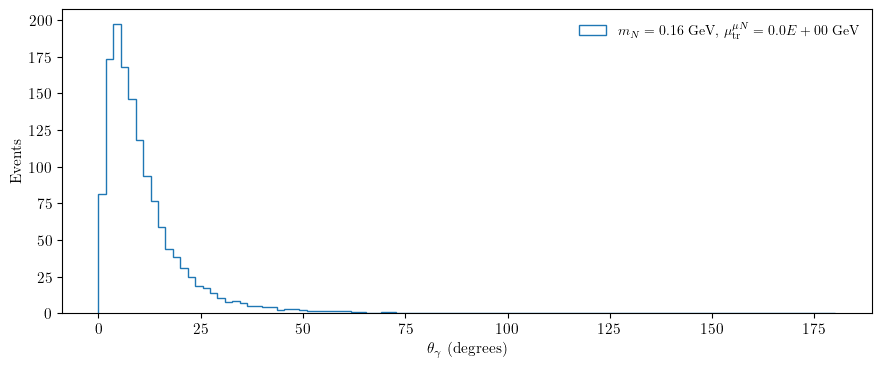

In [108]:
theta_beam = np.arccos(dn.fourvec.df_cos_azimuthal(df_photon['P_decay_photon']))*dn.const.rad_to_deg

fig, ax = dn.plot_tools.std_fig(figsize=(10,4))

t_bins = np.linspace(0, 180, 100)
_=ax.hist(theta_beam, weights=df_photon['w_event_rate'], bins=t_bins, histtype='step', label=rf'$m_N = {df_photon.attrs["model"].m4}$~GeV, $\mu^{{\mu N}}_{{\rm tr}} = {df_photon.attrs["model"].mu_tr_mu4:.1E}$~GeV')

ax.legend(loc='best')
ax.set_ylabel('Events')
ax.set_xlabel(r'$\theta_{\gamma}$ (degrees)')

In [109]:
tot_counts = np.genfromtxt('micro_total_theory.dat')
bkg_counts = np.genfromtxt('micro_total_theory_2.dat')

Text(0.5, 0, '$E_{\\gamma}$ (GeV)')

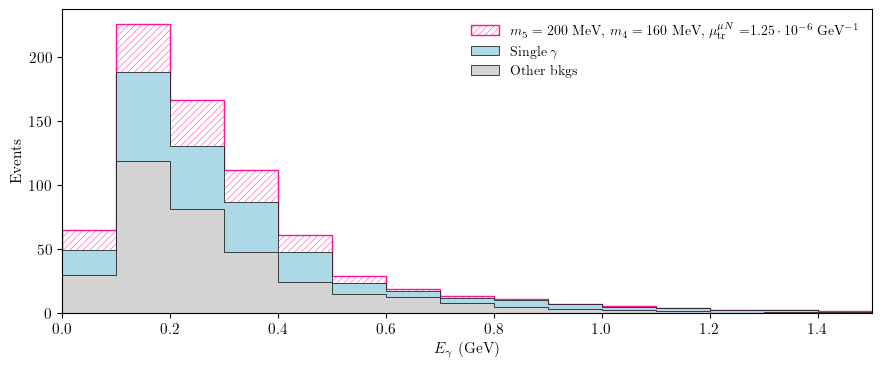

In [110]:
egamma = df_photon['P_decay_photon','0']

fig, ax = dn.plot_tools.std_fig(figsize=(10,4))

t_bins = np.linspace(0, 1.5, 16)
h, _ =np.histogram(egamma, weights=df_photon['w_event_rate']*0.1, bins=t_bins)

from DarkNews import plot_tools as pt

_=ax.hist(t_bins[:-1], weights=(tot_counts+h), bins=t_bins, histtype='stepfilled', facecolor='None', edgecolor='deeppink', hatch=5*'/', label=rf'$m_5 = {df_photon.attrs["model"].m5*1e3:.0f}$~MeV, $m_4 = {df_photon.attrs["model"].m4*1e3:.0f}$~MeV, $\mu^{{\mu N}}_{{\rm tr}} = ${pt.sci_notation(df_photon.attrs["model"].mu_tr_mu5, decimal_digits=2,)}~GeV$^{{-1}}$')
_=ax.hist(t_bins[:-1], weights=tot_counts, bins=t_bins, histtype='stepfilled', facecolor='lightblue', edgecolor='black', lw=0.5, label=r'Single $\gamma$')
_=ax.hist(t_bins[:-1], weights=bkg_counts, bins=t_bins, histtype='stepfilled', facecolor='lightgrey', edgecolor='black', lw=0.5, label=r'Other bkgs')

# Adding error bars
bin_centers = 0.5 * (t_bins[1:] + t_bins[:-1])
tot_errors = np.sqrt(tot_counts)
bkg_errors = np.sqrt(bkg_counts)

# ax.errorbar(bin_centers, tot_counts, yerr=tot_errors, fmt='', color='blue', label='Single $\gamma$ errors')
# ax.errorbar(bin_centers, bkg_counts, yerr=bkg_errors, fmt='', color='grey', label='Other bkgs errors')

ax.set_xlim(0, 1.5)
ax.legend(loc='best')
ax.set_ylabel('Events')
ax.set_xlabel(r'$E_{\gamma}$ (GeV)')

#### Now we compute a couple of magnetic moment cases with Z boson contributions included

In [ ]:
model_kwargs = { 'm4': 0.40, 'UD4': 0, 'epsilon': 0}

dfs_nomix=[]
dfs_mix=[]
mutrs = [1e-15, 2e-10, 3e-9,3e-8]
for mutr in mutrs:
    gen_object = GenLauncher(mu_tr_mu4=mutr, Umu4=1.5e-3, experiment = "microboone", decay_product='photon', neval = 10000, noHC=True, HNLtype="dirac", loglevel='ERROR', **model_kwargs)
    dfs_mix.append(gen_object.run())

    gen_object = GenLauncher(mu_tr_mu4=mutr, Umu4=0.0, experiment = "microboone", decay_product='photon', neval = 10000, noHC=True, HNLtype="dirac", loglevel='ERROR', **model_kwargs)
    dfs_nomix.append(gen_object.run())


In [ ]:
fig, ax = dn.plot_tools.std_fig(figsize=(8,4))

for df_mix,df_nomix,mutr in zip(dfs_mix,dfs_nomix,mutrs):
    egamma = df_mix['P_decay_photon','0']
    _=ax.hist(egamma, weights=df_mix['w_event_rate',''], bins=np.linspace(0,2,30), histtype='step', density=True, label=fr'$\mu_{{\rm tr}} = $ {mutr} GeV$^{{-1}}$ -- $|U_{{\mu}}|=1.5\times10{{-3}}$')

    egamma = df_nomix['P_decay_photon','0']
    _=ax.hist(egamma, weights=df_nomix['w_event_rate',''], bins=np.linspace(0,2,30), histtype='step', ls='--', density=True, label=fr'$\mu_{{\rm tr}} = $ {mutr} GeV$^{{-1}}$ -- $|U_{{\mu}}|=0$')

ax.legend(loc='best')
ax.set_ylabel('Events')
ax.set_xlabel(r'$E_{\gamma}$ (GeV)')
dn.plot_tools.std_savefig(fig,'plots/TMM_and_mixing.pdf')

## Now let's look at some cross sections for TMM upscattering

In [ ]:
# targets
proton = dn.detector.NuclearTarget("H1")
C12    = dn.detector.NuclearTarget("C12")
Ar40   = dn.detector.NuclearTarget("Ar40")

In [ ]:
common_kwargs = {'nu_projectile': pdg.numu, 'scattering_regime': 'coherent', 'nuclear_target': C12}
common_kwargs_pel = {'nu_projectile': pdg.numu, 'scattering_regime': 'p-el', 'nuclear_target': C12}
masses = [0.1,0.2,0.4,0.6]

Enu_range=np.linspace(0,2,50)

# Calculating xsecs in C
xsecs_C = []
for m in masses:
    this_model = dn.model.ThreePortalModel(name='vergani_et_al', m4 = m, Umu4=0.0, epsilon=0.0, mu_tr_mu4=4e-7)
    calc = dn.UpscatteringProcess(TheoryModel = this_model, helicity = 'flipping', nu_upscattered= this_model.neutrino4, **common_kwargs)
    calc_pel = dn.UpscatteringProcess(TheoryModel = this_model, helicity = 'flipping', nu_upscattered= this_model.neutrino4, **common_kwargs_pel)

    xsecs_C.append((calc.total_xsec(Enu_range, NEVAL=10000, NINT=10), calc_pel.total_xsec(Enu_range, NEVAL=10000, NINT=10)))

# Now on Argon40
common_kwargs = {'nu_projectile': pdg.numu, 'scattering_regime': 'coherent', 'nuclear_target': Ar40}
common_kwargs_pel = {'nu_projectile': pdg.numu, 'scattering_regime': 'p-el', 'nuclear_target': Ar40}
xsecs_Ar = []
for m in masses:
    this_model = dn.model.ThreePortalModel(name='vergani_et_al', m4 = m, Umu4=0.0, epsilon=0.0, mu_tr_mu4=4e-7)
    calc = dn.UpscatteringProcess(TheoryModel = this_model, helicity = 'flipping', nu_upscattered= this_model.neutrino4, **common_kwargs)
    calc_pel = dn.UpscatteringProcess(TheoryModel = this_model, helicity = 'flipping', nu_upscattered= this_model.neutrino4, **common_kwargs_pel)
    xsecs_Ar.append((calc.total_xsec(Enu_range, NEVAL=10000, NINT=10), calc_pel.total_xsec(Enu_range, NEVAL=10000, NINT=10)))


In [ ]:
fig = plt.figure(figsize=dn.plot_tools.std_figsize)
gs = fig.add_gridspec(2, 1, hspace=0, wspace=0, height_ratios=[1.5,1])
axs = gs.subplots(sharex='col', sharey='row')

colors = ['dodgerblue','darkorange','deeppink','black']

mu_tr_norm = (4e-7)**2*dn.const.invGeV2_to_cm2

for m, xs, color in zip(masses, xsecs_C, colors):
    axs[0].plot(Enu_range, xs[0]/mu_tr_norm, lw=1.0, label=rf'$m_N = {m*1e3:.0f}$~MeV', c=color)
    axs[0].plot(Enu_range, xs[1]/mu_tr_norm, lw=1.0, ls='--', c=color)
    axs[1].plot(Enu_range, xs[0]/xs[1], ls='-', lw=1.0, c=color)

axs[1].hlines(1,0,2, ls='--', lw=0.5, color='grey')

for ax in axs.flat:
    ax.label_outer()
    ax.set_yscale("log")
    ax.set_xlim(min(Enu_range), max(Enu_range))

    ax.set_xlabel(r'$E_\nu$/GeV')
axs[0].set_ylabel(r'$\sigma/|\mu_{\rm tr}|^2$/Carbon')
axs[1].set_ylabel(r'$\sigma_{\rm coh}/\sigma_{\rm p-el}$ on Carbon')

axs[0].set_ylim(1e-4, 10)
axs[1].set_ylim(0.005, 50)
axs[1].set_yticks([1e-3,1e-2,0.1,1,10,50])

proxy, = plt.plot([0,0],[0,0],linestyle='-', lw=1.0, color='black')
proxy2, = plt.plot([0,0],[0,0],linestyle='--', lw=1.0, color='black')
leg = axs[1].legend([proxy,proxy2], [r"coherent",r"p-elastic"], frameon=False, ncol=2, loc = (0.2,2.5))
axs[0].legend(frameon=False, loc='lower right')

plt.savefig("plots/example_2_xsec_C.pdf",dpi=400)

In [ ]:
fig = plt.figure(figsize=dn.plot_tools.std_figsize)
gs = fig.add_gridspec(2, 1, hspace=0, wspace=0, height_ratios=[1.5,1])
axs = gs.subplots(sharex='col', sharey='row')

colors = ['dodgerblue','darkorange','deeppink','black']

mu_tr_norm = (4e-7)**2*dn.const.invGeV2_to_cm2

for m, xs, color in zip(masses, xsecs_Ar, colors):
    axs[0].plot(Enu_range, xs[0]/mu_tr_norm, lw=1.0, label=rf'$m_N = {m*1e3:.0f}$~MeV', c=color)
    axs[0].plot(Enu_range, xs[1]/mu_tr_norm, lw=1.0, ls='--', c=color)
    axs[1].plot(Enu_range, xs[0]/xs[1], ls='-', lw=1.0, c=color)

axs[1].hlines(1,0,2, ls='--', lw=0.5, color='grey')

for ax in axs.flat:
    ax.label_outer()
    ax.set_yscale("log")
    ax.set_xlim(min(Enu_range), max(Enu_range))

    ax.set_xlabel(r'$E_\nu$/GeV')
axs[0].set_ylabel(r'$\sigma/|\mu_{\rm tr}|^2$/Argon')
axs[1].set_ylabel(r'$\sigma_{\rm coh}/\sigma_{\rm p-el}$ on Argon')

axs[0].set_ylim(1e-4, 100)
axs[1].set_ylim(0.005, 50)
axs[1].set_yticks([1e-3,1e-2,0.1,1,10,50])

proxy, = plt.plot([0,0],[0,0],linestyle='-', lw=1.0, color='black')
proxy2, = plt.plot([0,0],[0,0],linestyle='--', lw=1.0, color='black')
leg = axs[1].legend([proxy,proxy2], [r"coherent",r"p-elastic"], frameon=False, ncol=2, loc = (0.2,2.5))
axs[0].legend(frameon=False, loc='lower right')

plt.savefig("plots/example_2_xsec_Ar.pdf",dpi=400)

In [ ]:
fig, ax = dn.plot_tools.std_fig()
axs = [ax]
colors = ['dodgerblue','darkorange','deeppink','black']
ratio = 1/(18/6)**2
for m, xs_C, xs_Ar, color in zip(masses, xsecs_C, xsecs_Ar, colors):
    axs[0].plot(Enu_range, ratio*xs_Ar[0]/xs_C[0], lw=1.0, label=rf'$m_N = {m*1e3:.0f}$~MeV', c=color)
    # axs[0].plot(Enu_range, xs_Ar[1]/xs_C[1], lw=1.0, ls='--', c=color)
ax.set_xlim(min(Enu_range), max(Enu_range))
ax.set_ylim(0,1.2)

ax.set_xlabel(r'$E_\nu$/GeV')
ax.set_ylabel(r'$(6/18)^2 \times \sigma_{\rm Argon}^{\rm coh}/\sigma_{\rm Carbon}^{\rm coh}$')

proxy, = plt.plot([0,0],[0,0],linestyle='-', lw=1.0, color='black')
proxy2, = plt.plot([0,0],[0,0],linestyle='--', lw=1.0, color='black')
leg = ax.legend([proxy,proxy2], [r"coherent",r"p-elastic"], frameon=False, ncol=2, loc = (0.2,1.05))
ax.legend(frameon=False, loc='upper left', ncol=2)

plt.savefig("plots/example_2_xsec_CtoAr.pdf",dpi=400)